In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize'] = 10,6

In [3]:
df = pd.read_csv("airline-passengers.csv")

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
# df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
# indexedDataSet = df.set_index(['Month'])

indexedDataSet = pd.read_csv("airline-passengers.csv",index_col=[0],parse_dates=[0])

In [12]:
indexedDataSet.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
indexedDataSet.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


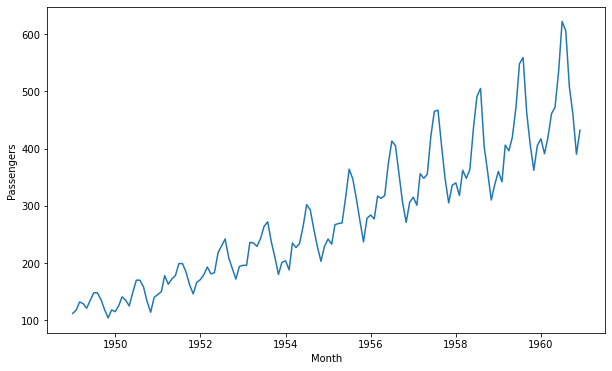

In [15]:
plt.figure()
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.plot(indexedDataSet)

In [33]:
#Rolling Statistics
def rolling_statistics(indexedDataSet):
    rolmean = indexedDataSet.rolling(window=12).mean()
    rolstd = indexedDataSet.rolling(window=12).std()

    print(rolmean)
    print(rolstd)

    plt.plot(indexedDataSet,label='original')
    plt.plot(rolmean,label='Mean')
    plt.plot(rolstd,label='Standard Deviation')
    plt.legend()
    plt.title("Rolling Mean And Standard Deviation")
    plt.show()

In [34]:
# Perform Dickey-Fuller Test
def dickey_fuller_test(indexedDataSet):
    dftest = adfuller(indexedDataSet['Passengers'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value

    print(dfoutput)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


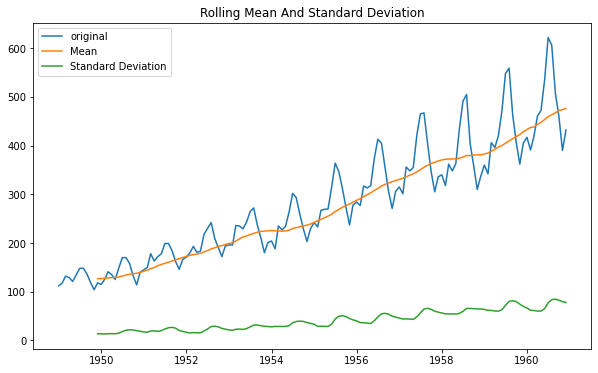

In [35]:
rolling_statistics(indexedDataSet)

In [36]:
dickey_fuller_test(indexedDataSet)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


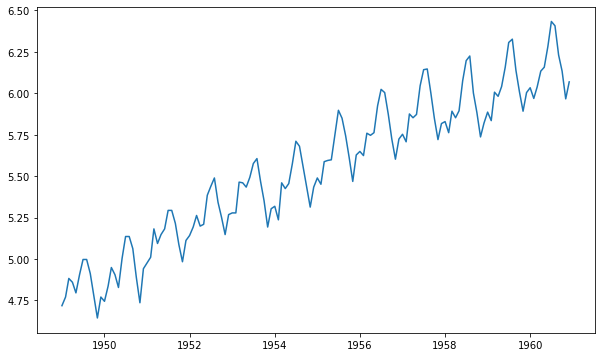

In [25]:
indexedDataSet_log = np.log(indexedDataSet)
plt.plot(indexedDataSet_log)
plt.show()

In [26]:
movingAverage_mean = indexedDataSet_log.rolling(window=12).mean()
movingAverage_std = indexedDataSet_log.rolling(window=12).std()

print(movingAverage_mean)
print(movingAverage_std)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215

[144 rows x 1 columns]
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    0.171453
1960-09-01    0.174172
1960-10-01    0.169804
1960-11-01    0.160923
1960-12-01    0.156660

[144 rows x 1 columns]


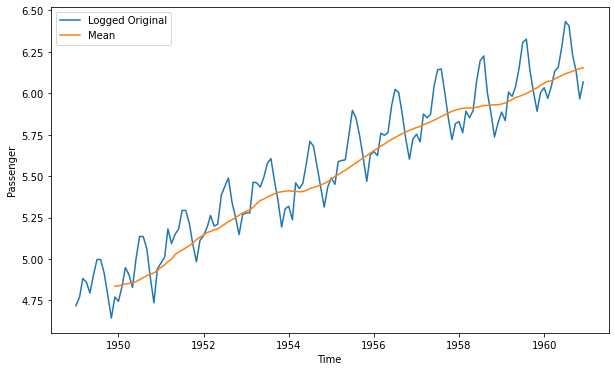

In [28]:
plt.figure()
plt.xlabel("Time")
plt.ylabel("Passenger")
plt.plot(indexedDataSet_log,label="Logged Original")
plt.plot(movingAverage_mean,label='Mean')
# plt.plot(movingAverage_std,label='Standard Derivation')
plt.legend()
plt.show()

In [30]:
datasetLogScaleMinusMovingAverage = indexedDataSet_log - movingAverage_mean

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


            Passengers
Month                 
1949-12-01         NaN
1950-01-01         NaN
1950-02-01         NaN
1950-03-01         NaN
1950-04-01         NaN
...                ...
1960-08-01    0.053566
1960-09-01    0.051081
1960-10-01    0.051255
1960-11-01    0.047814
1960-12-01    0.044372

[133 rows x 1 columns]
            Passengers
Month                 
1949-12-01         NaN
1950-01-01         NaN
1950-02-01         NaN
1950-03-01         NaN
1950-04-01         NaN
...                ...
1960-08-01    0.145302
1960-09-01    0.144162
1960-10-01    0.144082
1960-11-01    0.149491
1960-12-01    0.152260

[133 rows x 1 columns]


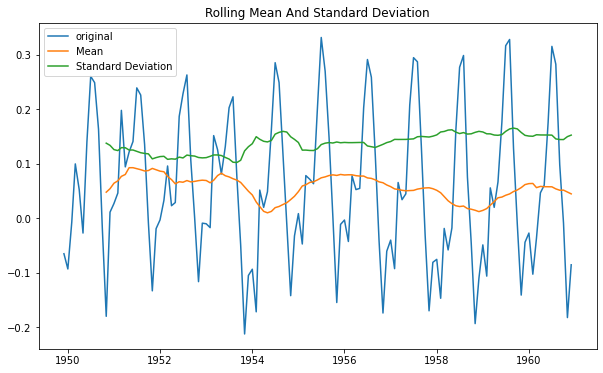

In [37]:
rolling_statistics(datasetLogScaleMinusMovingAverage)

In [39]:
dickey_fuller_test(datasetLogScaleMinusMovingAverage)

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value(1%)              -3.486535
Critical Value(5%)              -2.886151
Critical Value(10%)             -2.579896
dtype: float64
